## Описание 

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)


BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь


PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре


default - индикатор невозврата денежных средств

### Дополнительно

Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать. Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях. 

При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента. При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. 

Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость. Выполненное задание необходимо представить в ipython-ноутбука

### Задания



1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?


2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)


3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?


4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.


5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

## 1. Загрузка библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2. Загрузка данных

In [4]:
raw = pd.read_csv("credit_card_default_analysis.csv") 
raw

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 3. Задание 1
### Описание

Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:

a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

Значимы ли полученные результаты с практической точки зрения ?

#### Разобьем данные

In [5]:
# в виде pd

data_default_back_pd = raw[raw['default']  == 0].LIMIT_BAL # размер кредита, где вернули кредит
data_default_notback_pd = raw[raw['default']  == 1].LIMIT_BAL # размер кредита, где не вернули кредит

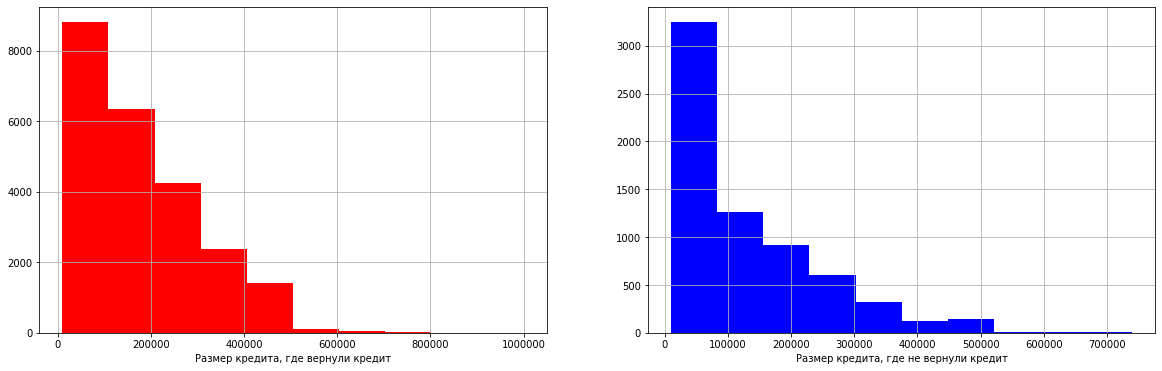

In [6]:
pylab.figure(figsize=(20,6))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(data_default_back_pd, color = 'r')
pylab.xlabel('Размер кредита, где вернули кредит')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(data_default_notback_pd, color = 'b')
pylab.xlabel('Размер кредита, где не вернули кредит')

pylab.show()

<function matplotlib.pyplot.show(*args, **kw)>

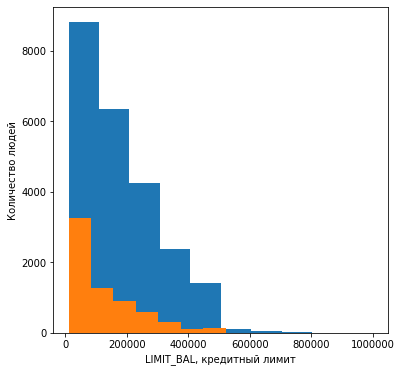

In [7]:
pylab.figure(figsize=(6,6))

plt.hist(data_default_back_pd)
plt.hist(data_default_notback_pd)
plt.xlabel('LIMIT_BAL, кредитный лимит')
plt.ylabel('Количество людей')
plt.show

### Пункт А 

a) Проверяем гипотезу о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки

$H_0\colon$ медиана размера кредитного лимита для обеих групп (выдан кредит или нет) одинакова

$H_1\colon$ медиана размера кредитного лимита для обеих групп (выдан кредит или нет) не одинакова

Поскольку у нас нет информации о распределении, то можно воспользоваться интервальной оценкой на основе bootstrap:


Бутстрэп генерирует N псвевдовыборок обьема n и оценивает выборочное распределение Tn.
Извлечение выборок из генеральной совокупности - сэмплирование из неизвестного распределения Fx(x).
Лучшая оценка Fx(x), которая у нас есть - Fxn(x). 

In [8]:
# функция реализация бутстрэпа
# n_samples - количество выборок
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data))) # вспомогательная функция для получения псевдоподвыборок
    samples = data[indices]
    return samples


# считаем набор статистик

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [9]:
# разбиваем данные в виде np для бутстрэпа

data_default_back=raw[raw.default == 0].LIMIT_BAL.values
data_default_notback=raw[raw.default == 1].LIMIT_BAL.values

In [10]:
# считаем для медианы (статистика)

np.random.seed(0)

back_median_scores = list(map(np.median, get_bootstrap_samples(data_default_back, 1000)))
notback_median_scores = list(map(np.median, get_bootstrap_samples(data_default_notback, 1000)))

print("95% confidence interval for the ILEC median repair time:",  stat_intervals(back_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(notback_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [150000. 150000.]
95% confidence interval for the CLEC median repair time: [80000. 90000.]


In [11]:
# интервал для разности медиан

delta_median_scores = list(map(lambda x: x[1] - x[0], zip(back_median_scores, notback_median_scores)))

print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-70000. -60000.]


### Вывод:

1. Интервальная оценка разности медиан не содержит ноль, следовательно, интервальная оценка медиан не пересекается. 
2. Гипоте Н0 отвергается. Принимается гипотеза Н1

### Пункт Б

b) Проверяем гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 
Значимы ли полученные результаты с практической точки зрения ?

$H_0\colon$ распределения размера кредитного лимита для обеих групп (выдан кредит или нет) одинаковы

$H_1\colon$ распределения размера кредитного лимита для обеих групп (выдан кредит или нет) разные

Для двух независимых выборок применяется критерий Манна-Уитни.Условия выполнения критерия:

1. В каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.

In [12]:
print(len(data_default_back))
print(len(data_default_notback))

23364
6636


2. В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10).

In [13]:
print(len(data_default_back_pd.unique()))
print(len(data_default_notback_pd.unique()))

80
65


Условия для применения критерия Манна-Уитни не выполняются. Для независимых выборок существует ещё один класс критериев, а именно перестановочные. Однако, они требуют тех же самых условий, что и ранговые. Поэтому будем использовать критерий Манна-Уитни:

In [14]:
sc.stats.mannwhitneyu(data_default_back, data_default_notback)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

### Вывод:

P-value < 0.05, следовательно, гипотезу о равенстве распределений следует отвергнуть. И принять гипотезу H1

## 4. Задание 2
### Описание

Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [15]:
# в виде pd

data_woman_pd = raw[raw['SEX']  == 1].default # женщины и вовзратность кредита
data_man_pd = raw[raw['SEX']  == 2].default # мужчины и вовзратность кредита

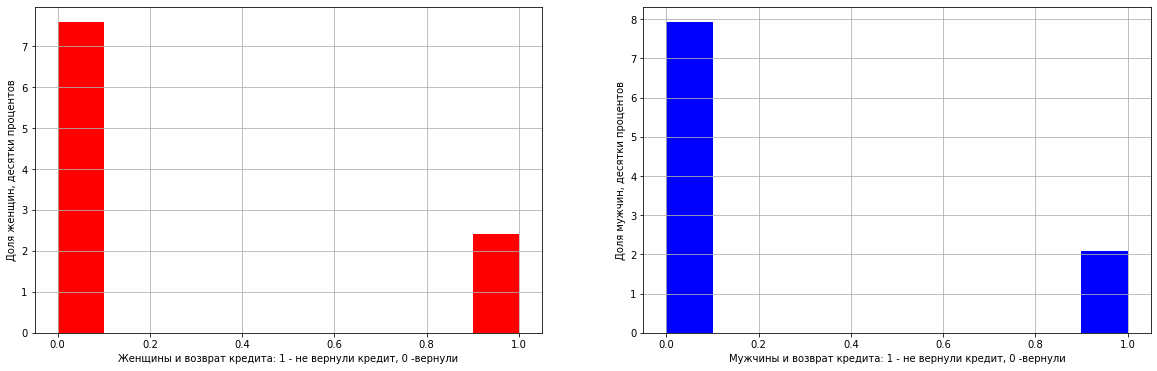

In [16]:
pylab.figure(figsize=(20,6))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(data_woman_pd, color = 'r',density = True)
pylab.xlabel('Женщины и возврат кредита: 1 - не вернули кредит, 0 -вернули')
pylab.ylabel('Доля женщин, десятки процентов')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(data_man_pd, color = 'b', density = True)
pylab.xlabel('Мужчины и возврат кредита: 1 - не вернули кредит, 0 -вернули')
pylab.ylabel('Доля мужчин, десятки процентов')

pylab.show()

По графику можно заметить, что женщины возвращают кредит немного чаще.

Проверим гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается (гипотеза однородности выборок). Для этого найдём интервальную оценку разности долей.

$H_0\colon$ гендерный состав группы людей вернувших и не вернувших кредит одинаков

$H_1\colon$ гендерный состав группы людей вернувших и не вернувших кредит отличается 

Используем интервальную оценку для разности двух долей 

In [17]:
# генерируем датасеты - половой состав вернувших и не вернувших кредит 

data_default0_sex_pd = raw[raw['default']  == 0].SEX # половой состав вернувших кредит
data_default1_sex_pd= raw[raw['default']  == 1].SEX # половой состав не вернувших кредит

заменим данные с:

    1 - мужчины
    2 - женщины
    
на:
        
    1 - мужчины
    0 - женщины        
        

In [18]:
data_default0_sex = data_default0_sex_pd.replace(to_replace=2, value=0) # половой состав вернувших кредит
data_default1_sex = data_default1_sex_pd.replace(to_replace=2, value=0) # половой состав не вернувших кредит

Поскольку у нас есть биноминальное распределение величин, то можно воспользоваться доверительным интервалом Уилсона

In [19]:
conf_data_default0_sex = proportion_confint(sum(data_default0_sex), 
                                            len(data_default0_sex),
                                            method = 'wilson')

conf_data_default1_sex = proportion_confint(sum(data_default1_sex), 
                                            len(data_default1_sex),
                                            method = 'wilson')

In [20]:
print('interval for вернувших кредит мужчин a [%f, %f]' % conf_data_default0_sex)
print('interval for не вернувших кредит мужчин b [%f, %f]' % conf_data_default1_sex)

interval for вернувших кредит мужчин a [0.379627, 0.392110]
interval for не вернувших кредит мужчин b [0.421062, 0.444898]


### Вывод:

Интервалы не пересекаются, но находятся близко друг к другу. Можно сделать вывод, что мужчины не возвращают кредит чаще, чем женщины

In [21]:
# функция для расчета интервала для разности двух долей 

def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = sc.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [22]:
print('interval for разности двух долей [%f, %f]' % proportions_confint_diff_ind(data_default1_sex, data_default0_sex))

interval for разности двух долей [0.033635, 0.060548]


Теперь воспользумся биноминальным статистическим критерием 

Если нулевая гипотеза справедлива и гендерный состав не отличается, то можем предположить, что мы имеем дело с выборкой, состоящей из 0 и 1 (женщины и мужчины), то есть, из распределения Бернулли  𝐵𝑒𝑟(𝑝) . Нулевая гипотеза того, что нет разницы в гендерном различии при возврате кредита соответствует значению  𝑝=0.5.


In [23]:
print('Binom test для вернувших кредит: p=%.10f' % stats.binom_test(sum(data_default0_sex), len(data_default0_sex), 0.5, alternative = 'two-sided'))
print('Binom test для не вернувших кредит: p=%.10f' % stats.binom_test(sum(data_default1_sex), len(data_default1_sex), 0.5, alternative = 'two-sided'))


Binom test для вернувших кредит: p=0.0000000000
Binom test для не вернувших кредит: p=0.0000000000


### Вывод:

Значение p_value  в обоих случаях меньше 0.05, это говорит о том, что гендерный состав распределен не равномерно и гипотезу H0 можно отвергнуть

### Общие Выводы:


1. Нижняя граница доверительного интервала для разности долей немного больше нуля, на основании чего можно сделать вывод, что мужчины не возвращают кредит несколько чаще женщин. Также можно это заметить по гистограмме выше.
2. Гипотеза Н0 овтергается.
3. Возможная причина такой закономерности это то, что мужчины берут кредит чаще и чаще не возвращают.

## 5. Задание 3
### Описание

Образование (EDUCATION): 
Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. 
Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. 

Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? 
Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

$H_0\colon$ образование не влияет на то, вернет ли человек долг

$H_1\colon$ образование  влияет на то, вернет ли человек долг

### Значение признака

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

In [24]:
#cсгенерируем датасеты по каждому значению EDUCATION: default = 0, default = 1 

data_doctor_pd = raw[raw['EDUCATION']  == 0].default # доктора
data_magistr_pd = raw[raw['EDUCATION']  == 1].default # магистры
data_bachelour_pd = raw[raw['EDUCATION']  == 2].default # бакалавры
data_school_pd = raw[raw['EDUCATION']  == 3].default # выпусники школы
data_started_pd = raw[raw['EDUCATION']  == 4].default # начальное образование
data_other_pd = raw[raw['EDUCATION']  == 5].default # прочее
data_none_pd = raw[raw['EDUCATION']  == 6].default # нет данных


In [25]:
raw.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

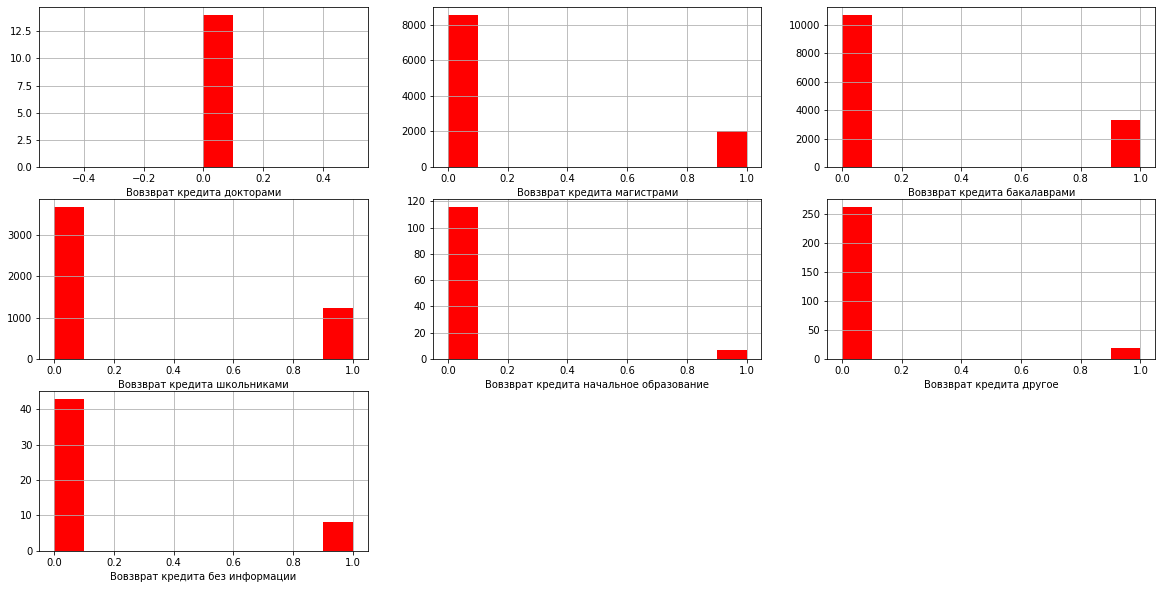

In [26]:
# постмроение диаграмм

pylab.figure(figsize=(20,10))

pylab.subplot(3,3,1)
pylab.grid()
pylab.hist(data_doctor_pd, color = 'r')
pylab.xlabel('Вовзврат кредита докторами')

pylab.subplot(3,3,2)
pylab.grid()
pylab.hist(data_magistr_pd, color = 'r')
pylab.xlabel('Вовзврат кредита магистрами')

pylab.subplot(3,3,3)
pylab.grid()
pylab.hist(data_bachelour_pd, color = 'r')
pylab.xlabel('Вовзврат кредита бакалаврами')

pylab.subplot(3,3,4)
pylab.grid()
pylab.hist(data_school_pd, color = 'r')
pylab.xlabel('Вовзврат кредита школьниками')

pylab.subplot(3,3,5)
pylab.grid()
pylab.hist(data_started_pd, color = 'r')
pylab.xlabel('Вовзврат кредита начальное образование')

pylab.subplot(3,3,6)
pylab.grid()
pylab.hist(data_other_pd, color = 'r')
pylab.xlabel('Вовзврат кредита другое')

pylab.subplot(3,3,7)
pylab.grid()
pylab.hist(data_none_pd, color = 'r')
pylab.xlabel('Вовзврат кредита без информации')

pylab.show()


### Выводы по гистограммам: 

1. Доктора всегда возвращают кредит
2. Чаще всего не возвращают кредит - бакалавры,магистры и выпускники школ.


В данном случае речь идёт о случайной величине, которая может принимать 2 значения:
- 0 (кредит возвращён, "неуспех") и 1 (кредит не возвращён, "успех"). 

Можно предположить, что эта случайная величина описывается биномиальным распределением.

Поэтому в качестве нулевой гипотезы примем предположение, что количество невозвратов кредита распределено по биномиальному распределению с вычисленным ниже значением параметра *p* (гипотеза согласия).

In [27]:
# среднее значение не возврата кредита

frequency = raw.default.mean()
frequency

0.2212

In [28]:
# индефиаторы образования по порядку

edu_values = sort(raw['EDUCATION'].unique())
print(edu_values)

[0 1 2 3 4 5 6]


In [29]:
# считаем частоты для ХИ-критерия

observed_frequences = []
expected_frequences = []

for i in edu_values:
    selected_data = raw.loc[raw['EDUCATION'] == i]
    positive = sum(selected_data['default']) # количество неозвратов
    total = len(selected_data['default']) # общее количество 
    expected = total * frequency # ождиаемое количество  = срдняя частота * общее количество 
    
    observed_frequences.append(positive)
    expected_frequences.append(expected)

print(observed_frequences)
print(expected_frequences)

[0, 2036, 3330, 1237, 7, 18, 8]
[3.0968, 2341.402, 3103.436, 1087.6404, 27.2076, 61.936, 11.2812]


In [30]:
sc.stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=127.11305526913317, pvalue=9.75132616866625e-26)

### Вывод:

Значение p_value близко к нулю, значит нулевую гипотезу о том, что распределение случайной величины распределено по биноминальному закону можно отвергнуть.

Построим таблицу сопряжённости, где значением ячейки будет разность между наблюдаемым и ожидаемым количеством человек. Так как вычислять будем разность частот, для default=0 и default=1 значения будут одинаковыми по модулю, поэтому оставим только значения для default=1.

In [31]:
# разница между наблюдаемыми и ожидаемыми частотами

default_1 = np.array(observed_frequences) - np.array(expected_frequences)
default_1

array([  -3.0968, -305.402 ,  226.564 ,  149.3596,  -20.2076,  -43.936 ,
         -3.2812])

In [32]:
# таблица частоты возвращения долга 

df = pd.DataFrame(index=['доктор', 'магистр', 'бакалавр', 'выпускник школы', 'начальное образование', 'прочее', 'нет данных'], columns = ['default_1'])
df['default_1'] = default_1
df

,default_1
доктор,-3.0968
магистр,-305.4020
бакалавр,226.5640
выпускник школы,149.3596
начальное образование,-20.2076
прочее,-43.9360
нет данных,-3.2812


Для улучшения интерпретируемости данных вместо абсолютных значений разностей можно подставить доли от ожидаемой частоты:

In [33]:
df['default_1'] = [round(i[0]/i[1], 2) for i in zip(default_1, expected_frequences)]
df

,default_1
доктор,-1.00
магистр,-0.13
бакалавр,0.07
выпускник школы,0.14
начальное образование,-0.74
прочее,-0.71
нет данных,-0.29


### Общие выводы

1. Существует взаимосвязь между образованием человека и вероятностью того, что он вернёт долг.
2. Наличие образования доктора является наилучшим индикатором того, что человек отдаст долг. Наличие же образования выпускнка школы, наоборт, является наилучшим индикатором того, что долг не будет возвращён.

## 6. Задание 4
### Описание

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [34]:
# значения индикатора

raw.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

In [35]:
# генерируем датасеты: семейное положение вернувших и не вернувших кредит 

data_noanswer = raw[raw['MARRIAGE']  == 0].default # отказываюсь отвечать
data_brak = raw[raw['MARRIAGE']  == 1].default # брак
data_holost= raw[raw['MARRIAGE']  == 2].default # холост
data_noinfo = raw[raw['MARRIAGE']  == 3].default # нет данных

In [36]:
sum(data_noanswer)/len(data_noanswer)

0.09259259259259259

Text(0.5, 0, 'Вовзврат кредита: нет данных')

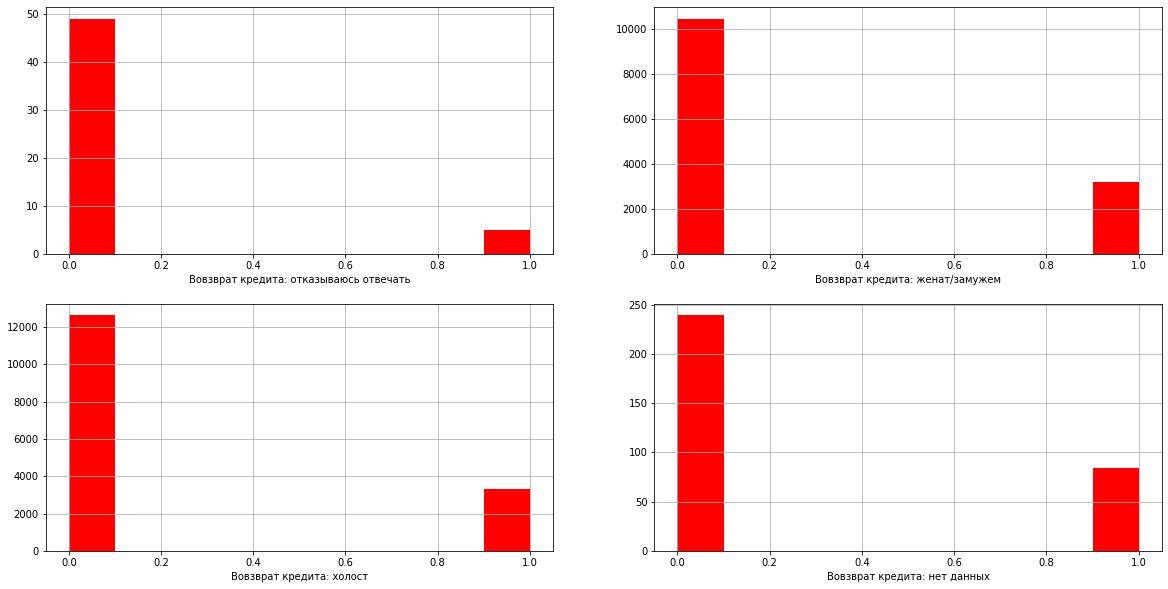

In [37]:
pylab.figure(figsize=(20,10))

pylab.subplot(2,2,1)
pylab.grid()
pylab.hist(data_noanswer, color = 'r')
pylab.xlabel('Вовзврат кредита: отказываюсь отвечать')

pylab.subplot(2,2,2)
pylab.grid()
pylab.hist(data_brak, color = 'r')
pylab.xlabel('Вовзврат кредита: женат/замужем')

pylab.subplot(2,2,3)
pylab.grid()
pylab.hist(data_holost, color = 'r')
pylab.xlabel('Вовзврат кредита: холост')

pylab.subplot(2,2,4)
pylab.grid()
pylab.hist(data_noinfo, color = 'r')
pylab.xlabel('Вовзврат кредита: нет данных')

In [38]:
print ('Доля невозврата кредита: отказываюсь отвечать', sum(data_noanswer)/len(data_noanswer))
print ('Доля невозврата кредита: замужем/женат',sum(data_brak)/len(data_brak))
print ('Доля невозврата кредита: холост', sum(data_holost)/len(data_holost))
print ('Доля невозврата кредита: нет данных', sum(data_noinfo)/len(data_noinfo))

Доля невозврата кредита: отказываюсь отвечать 0.09259259259259259
Доля невозврата кредита: замужем/женат 0.23471703638626545
Доля невозврата кредита: холост 0.20928338762214985
Доля невозврата кредита: нет данных 0.26006191950464397


### Вывод по гистограммам: 

Больше всего берут и не возвращают кредиты две группы: брак (доля невозврата 23%)  и холост (доля невозврата 21%)

Теперь оценим взаимосвязь фактора MARRIAGE и default. 

MARRIAGE - категориальная переменная.

Корреляция Пирсона - не подходит, поскольку этот коэфициент используется для непрерывныъх переменных. 

Корреляция Мэтьюса - не подходит, поскольку используется для бинарных величин, тут 4 категории (0,1,2,3)

Используем коэфициент Крамера - для оценки взаимосвязи категориальных переменных и отклика.



Построим таблицу сопряжённости:

In [39]:
confusion_matrix = pd.crosstab(raw['default'],raw['MARRIAGE']) # пересечение default и Marriage
confusion_matrix

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


#### Коэфициент V - крамера

Взял со Stackoverflow функцию для вычисления коэффициента V Крамера:

https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

In [40]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = sc.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [41]:
cramers_corrected_stat(confusion_matrix)

0.03299665874336609

### Выводы:

1. Семейное положение и признак невозврата долга положительно коррелированы: коэффициент V Крамера равен 0.032.
2. Cудя по гистограмме, холостые люди немного чаще не возвращают кредит, чем женатые и замужние

## 7. Задание 5
### Описание

Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: 

a) о равенстве медианных значений возрастов людей 

b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

Значимы ли полученные результаты с практической точки зрения ?

In [42]:
age_back = raw[raw['default']  == 0].AGE # возраст людей вернувших кредит
age_notback = raw[raw['default']  == 1].AGE # возраст людей не вернувших кредит

In [43]:
len(age_back.unique())

56

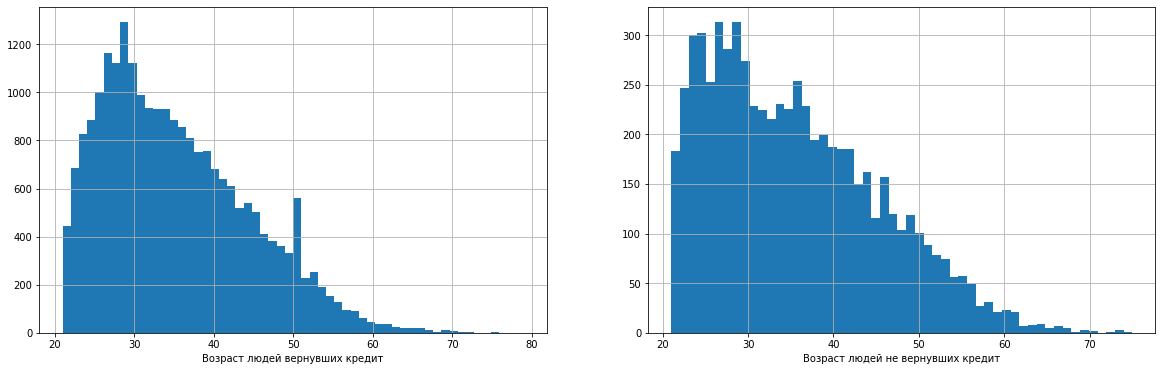

In [44]:
pylab.figure(figsize=(20,6))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(age_back,bins=len(age_back.unique()))
pylab.xlabel('Возраст людей вернувших кредит')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(age_notback,bins=len(age_notback.unique()))
pylab.xlabel('Возраст людей не вернувших кредит')

pylab.show()

### Вывод по гистограммам

Большего всего невозвратов кредита у людей до 30 лет. Дальше идет снижение данного показателя. 
Думаю, что это можно связать с тем, что до 30 лет самая беспокойная жизнь.

### Пункт А 

a) Проверяем гипотезу о равенстве медианных значений возрастов людей

$H_0\colon$ медиана значений возрастов людей для обеих групп одинакова

$H_1\colon$ медиана значений возрастов людей для обеих групп) не одинакова

Используем бутстрэп, как в задании 1 

In [45]:
# разбиваем данные в виде np для бутстрэпа


data_default_back=raw[raw.default == 0].AGE.values
data_default_notback=raw[raw.default == 1].AGE.values

In [46]:
# считаем для медианы (статистика)

np.random.seed(0)

back_median_scores = list(map(np.median, get_bootstrap_samples(data_default_back, 1000)))
notback_median_scores = list(map(np.median, get_bootstrap_samples(data_default_notback, 1000)))

print("95% confidence interval for the ILEC median repair time:",  stat_intervals(back_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(notback_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [34. 34.]
95% confidence interval for the CLEC median repair time: [34. 35.]


In [47]:
# интервал для разности медиан

delta_median_scores = list(map(lambda x: x[1] - x[0], zip(back_median_scores, notback_median_scores)))

print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [0. 1.]


### Вывод

Интервал включает 0, следовательно, гипотезу H0 нельзя отвергнуть.

### Пункт Б 

б) Проверяем гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.

$H_0\colon$ распределение значений возрастов людей для обеих групп одинакова

$H_1\colon$ распределение значений возрастов людей для обеих групп) не одинакова

Как и в первой задачи используем Критерий Манна-Уинтни. Условия для этого критерия:
* в каждой из выборок должно быть не менее 3 значений признака
* в выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10)

In [48]:
sc.stats.mannwhitneyu(data_default_back, data_default_notback)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

### Вывод: 

Гипотезу о равенстве распределений также не следует отвергать: p-value > 0.05.

### Общие выводы

1. Нельзя отвергнуть гипотезу о равенстве медиан групп.

2. Нельзя отвергнуть гипотезу о равенстве распределений групп.

3. Большего всего невозвратов кредита у людей до 30 лет. Дальше идет снижение данного показателя. Думаю, что это можно связать с тем, что до 30 лет самая беспокойная жизнь.

4. Говорить о практической значимости бессмысленно, поскольку гипотезу, которая не была отвергнута, нельзя считать также и доказанной. Однако, визуализация подсказывает, что некоторое влияние возвраста на вероятность невозврата кредита всё же существует.